In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pathlib
import os

import plotly.graph_objects as go
import ipywidgets as widgets

import matplotlib.animation as animation
from IPython.display import HTML

from definitive_dyn_indicators.scripts.config import lhc_square_test_configuration as lhc_config

In [55]:
def clean_data(array):
    array = np.asarray(array, dtype=object)
    array[np.isnan(array.astype(np.float_))] = None
    array[np.isinf(array.astype(np.float_))] = None
    return array


In [56]:
x_extents = lhc_config["x_extents"]
y_extents = lhc_config["y_extents"]

dx = lhc_config["x_sample"][1] - lhc_config["x_sample"][0]
dy = lhc_config["y_sample"][1] - lhc_config["y_sample"][0]

In [57]:
DATA_PATH = "../data"

In [58]:
files = os.listdir(DATA_PATH)
files = list(filter(lambda x: x.endswith(".pkl"), files))
files = list(filter(lambda x: x.startswith("initial_scan_"), files))

# get part of the file name from every file
mask_name = list(map(lambda x: "_".join(x[:-4].split("_")[2:]), files))

# make a dictionary
d = dict(zip(mask_name, [os.path.join(DATA_PATH, f) for f in files]))


In [59]:
test_label = "lhc_mask_b1_without_bb_1_long"
test_file = d[test_label]
with open(test_file, "rb") as f:
    test_data = pickle.load(f)

test_data.keys()


dict_keys(['line_name', 'x', 'px', 'y', 'py', 'steps'])

/tmp/ipykernel_129743/544569958.py:3: RuntimeWarning:

divide by zero encountered in log10



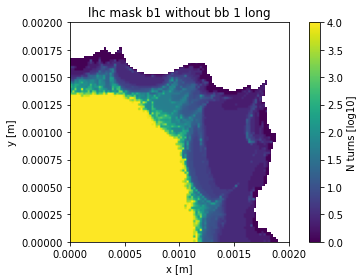

In [60]:
plt.figure()
plt.imshow(
    np.log10(test_data["steps"]), 
    origin="lower", 
    extent=[x_extents[0], x_extents[1], y_extents[0], y_extents[1]]
)
plt.colorbar(label="N turns [log10]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.title(f'{test_label.replace("_", " ")}')

plt.tight_layout()

In [61]:
d_keys = list(sorted(d.keys()))
files_dropdown = widgets.Dropdown(
    options=d_keys,
    value=test_label,
    description="File:",
    disabled=False,
)

# create stability heatmap
stab_plot = go.FigureWidget(
    data=go.Heatmap(
        z=clean_data(np.log10(test_data["steps"])),
        x0=x_extents[0],
        y0=y_extents[0],
        dx=dx,
        dy=dy,
        colorscale="Viridis"
    )
)
stab_plot.update_layout(
    title_text=f'Stability plot [log10], File = {files_dropdown.value.replace("_", " ")}',
    xaxis_title="x [m]", yaxis_title="y [m]"
)

widget_container = widgets.VBox([
    widgets.HBox([files_dropdown]), 
    widgets.HBox([stab_plot])
])


/tmp/ipykernel_129743/4209785915.py:12: RuntimeWarning:

divide by zero encountered in log10



In [62]:
def response(change):
    # get the file name
    file_name = d[files_dropdown.value]
    # load the data
    with open(file_name, "rb") as f:
        data = pickle.load(f)
    # update the plot
    stab_plot.data[0].z = clean_data(np.log10(data["steps"]))
    stab_plot.update_layout(
        title_text=f'Stability plot [log10], File = {files_dropdown.value.replace("_", " ")}',
        xaxis_title="x", yaxis_title="y"
    )

files_dropdown.observe(response, names="value")

In [63]:
widget_container